# Objective

Find blob_dog() threshold with normxcorr2.

# Results

Best threshold for non-bubble images is 0.1, yielding r^2 of 0.95 for predicted_count vs. gt_count.

Best threshold for bubble images is 0.1, yielding r^2 of 0.95 for predicted_count vs. gt_count.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from normxcorr2 import normxcorr2
from skimage.feature import blob_dog
from skimage.io import imread
from skimage import exposure, transform
from scipy.stats import linregress
from matplotlib.lines import Line2D
import warnings, math
warnings.filterwarnings('ignore')

In [2]:
def cross_correlate(im):
    im_normxcorr2 = normxcorr2(kernel, im)
    lr_edge = (im_normxcorr2.shape[0] - im.shape[0])/2
    ud_edge = (im_normxcorr2.shape[1] - im.shape[1])/2
    return im_normxcorr2[int(ud_edge):int(ud_edge*-1), int(ud_edge):int(ud_edge*-1)]

In [3]:
# kernel params
kernelSize = 150
ds = 2
discRadius = 3

In [4]:
# set up kernel
kernel = np.zeros((kernelSize, kernelSize), 'uint16')
kernelCtr = kernelSize/2
for rr in range(0, kernelSize + 1):
    for cc in range(0, kernelSize + 1):
        if  math.sqrt((rr - kernelCtr)**2 + (cc - kernelCtr)**2) < discRadius:
            kernel[rr, cc] = 65535
kernel = transform.downscale_local_mean(kernel, (ds,ds))

# Test all 71 images

In [5]:
names_raw = pd.read_csv('names.csv', header=None)
names = [x[0][23:-4] for x in names_raw.values]

In [6]:
names_raw = pd.read_csv('names_test.csv', header=None)
names_test = [x[0][14:] for x in names_raw.values]

In [7]:
bubble_image_names = [
    '20200901-193536-2',
    '20200916-192532-4',
    '20201002-131101-4'
]

In [8]:
bubble_image_names_test = [
    '20201217-142717-5',
    '20201217-142717-2',
    '20201217-142717-0',
    '20201216-163816-1',
    '20201216-141203-7',
    '20201216-135719-5',
    '20201216-135719-2'
]

In [9]:
# bubble detection parameters
n = 12
l = 256
intensity_thresh = 20000 # for binarizing

# Find best threshold for non-bubble images

0.03
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


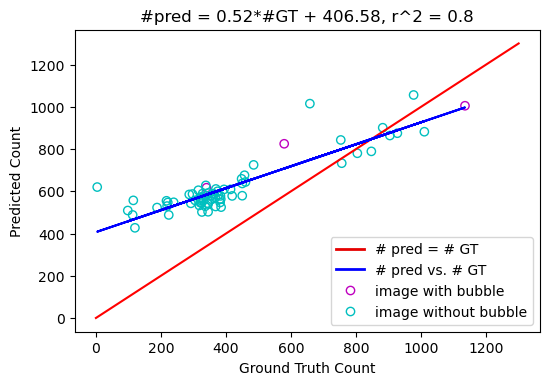

0.035
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


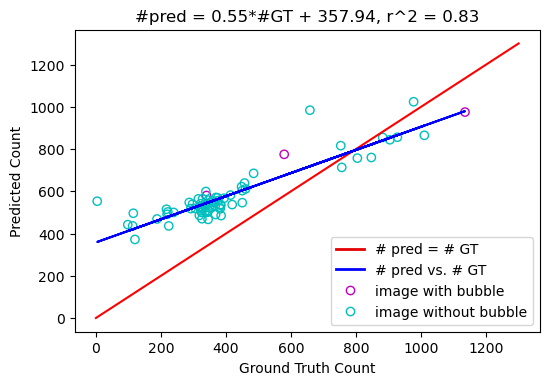

0.04
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


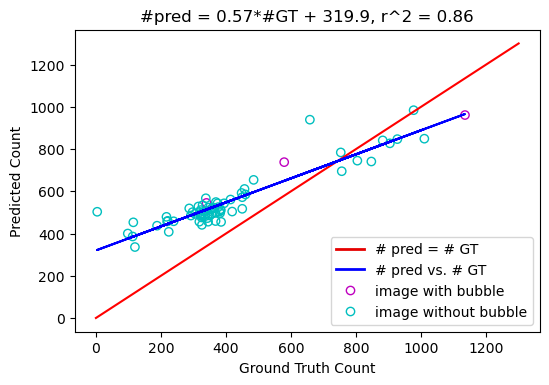

0.045
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


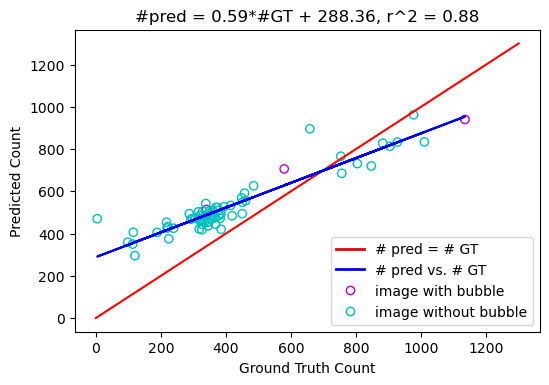

0.05
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


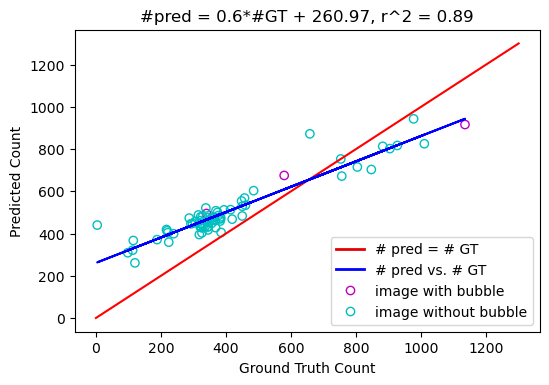

0.055
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


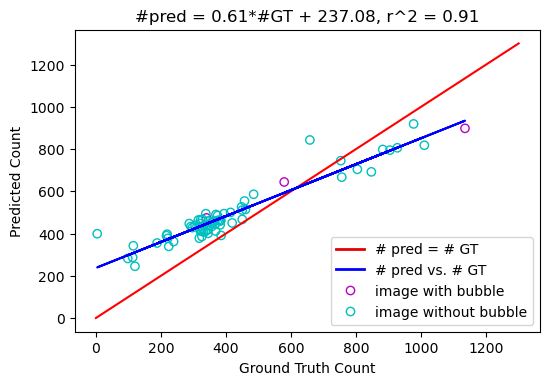

0.06
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


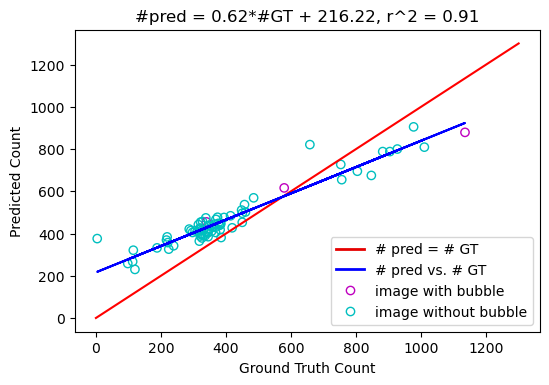

In [11]:
for thresh in [0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06]:
    print(thresh)
    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=thresh)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))
        if name in bubble_image_names:
            colors.append('m')
        else:
            colors.append('c')

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='r')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()

0.06
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


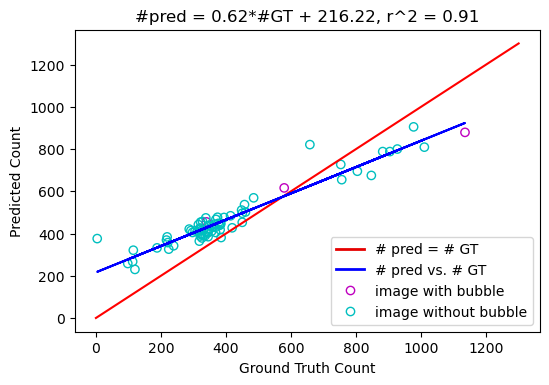

0.065
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


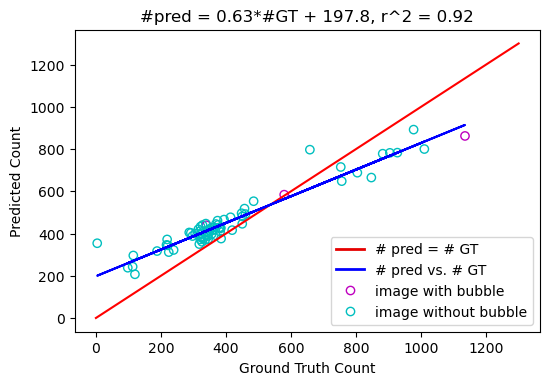

0.07
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


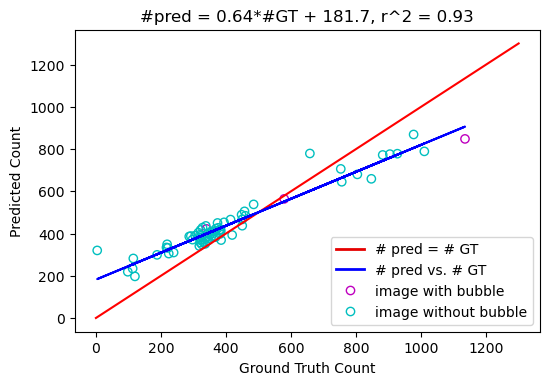

0.075
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


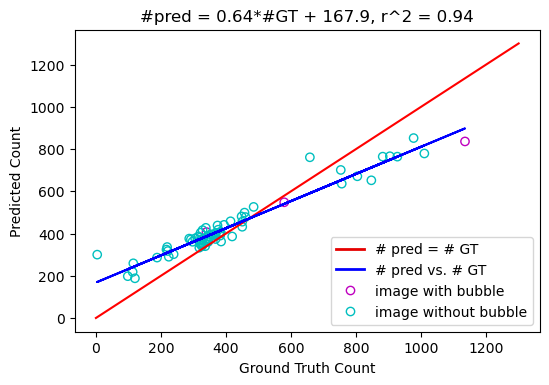

0.08
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


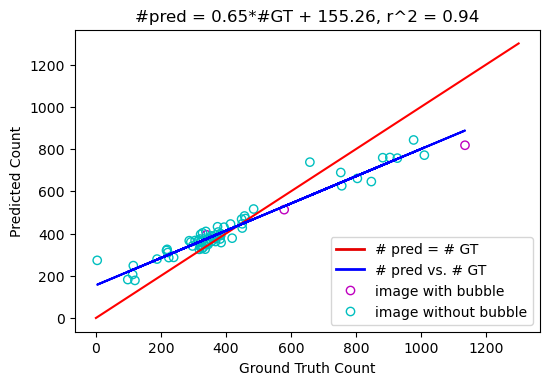

0.085
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


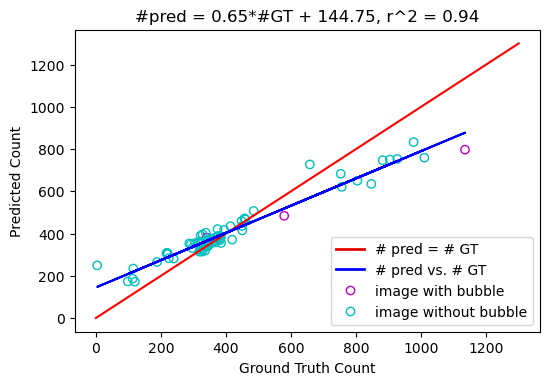

0.09
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


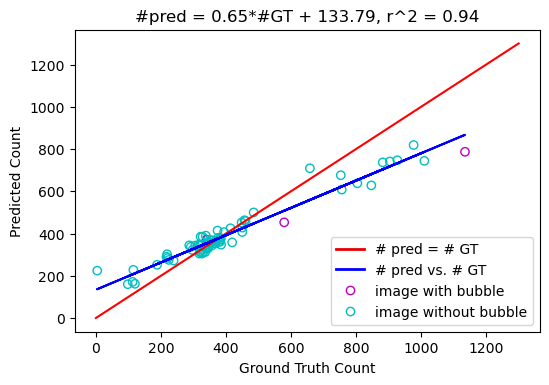

0.095
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


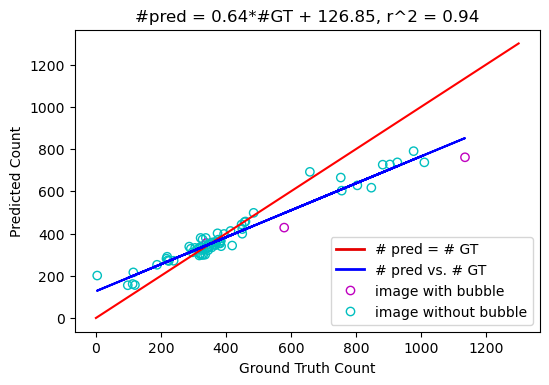

In [12]:
for thresh in [0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095]:
    print(thresh)
    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=thresh)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))
        if name in bubble_image_names:
            colors.append('m')
        else:
            colors.append('c')

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='r')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()

0.1
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


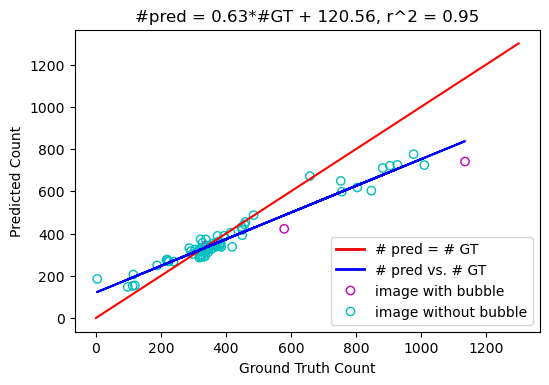

0.105
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


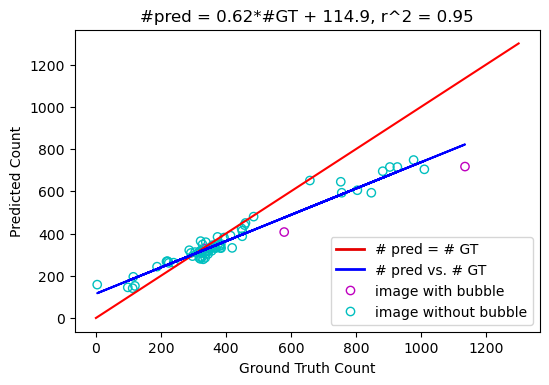

0.11
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


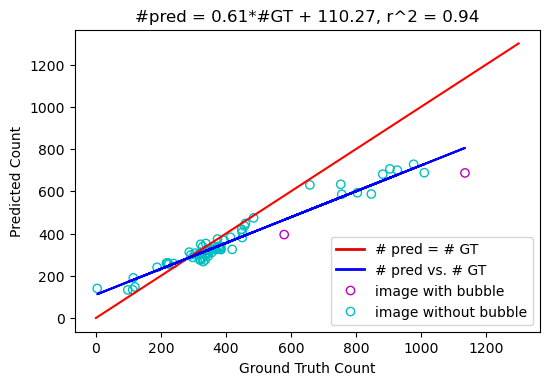

0.115
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


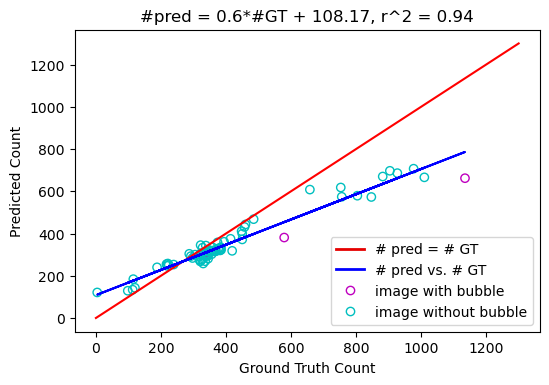

0.12
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


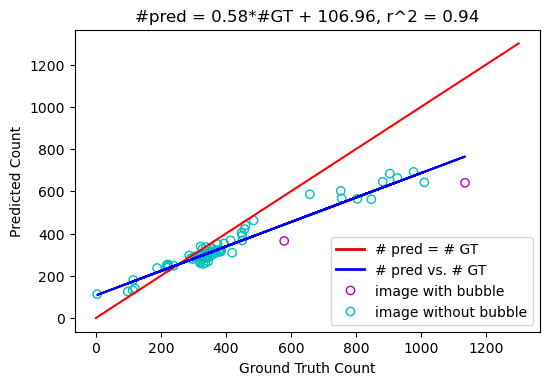

0.125
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


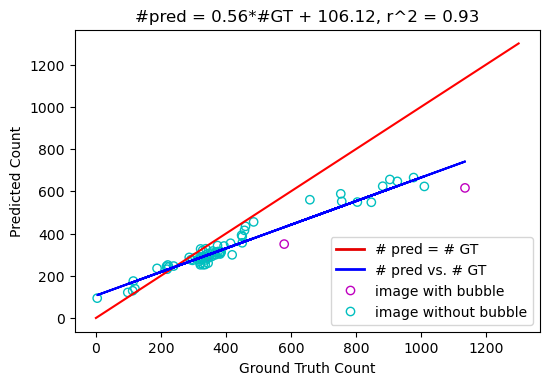

0.13
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


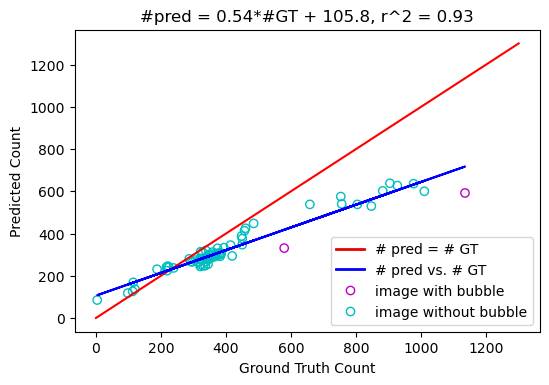

0.135
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


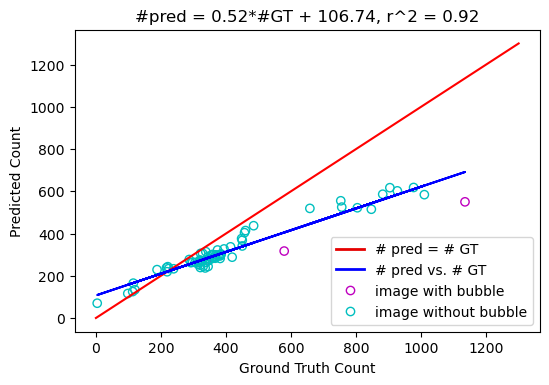

In [13]:
for thresh in [0.1, 0.105, 0.110, 0.115, 0.120, 0.125, 0.130, 0.135]:
    print(thresh)
    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=thresh)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))
        if name in bubble_image_names:
            colors.append('m')
        else:
            colors.append('c')

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='r')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()

# Find best threshold for bubble images

0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


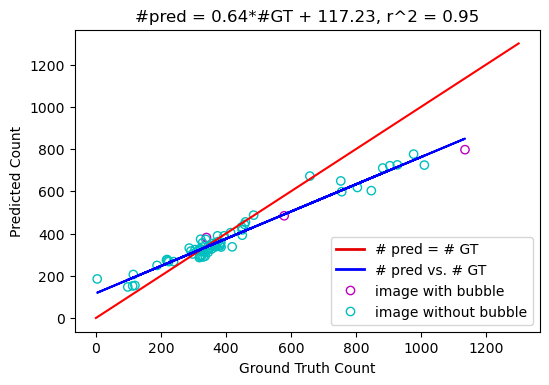

0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


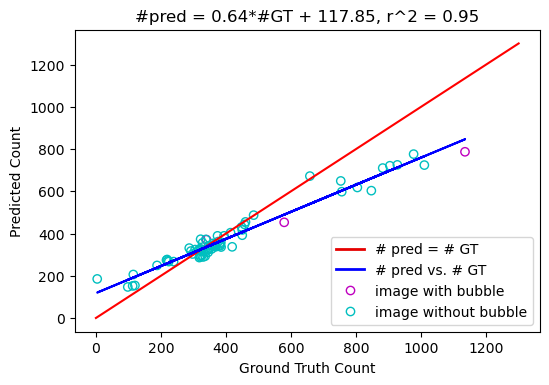

0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


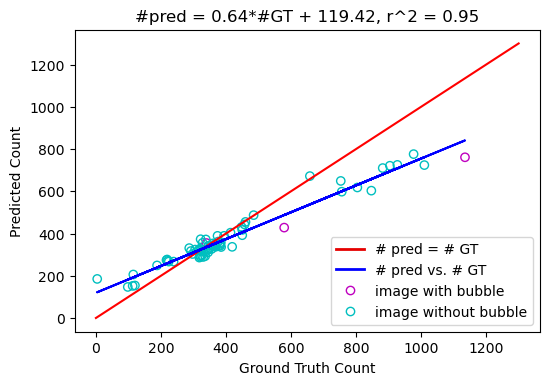

In [15]:
for bubble_thresh in [0.085, 0.09, 0.095]:
    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        if name in bubble_image_names:
            colors.append('m')
            threshold=bubble_thresh
        else:
            colors.append('c')
            threshold=0.1
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=threshold)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='r')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()

0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


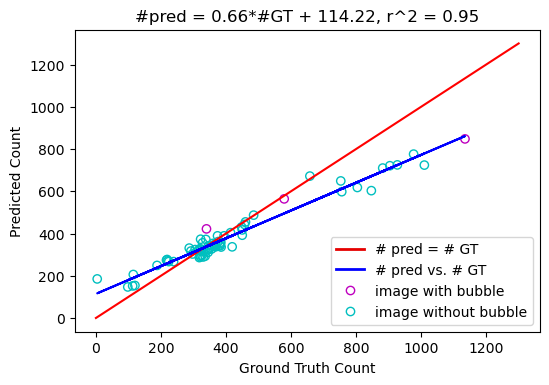

0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


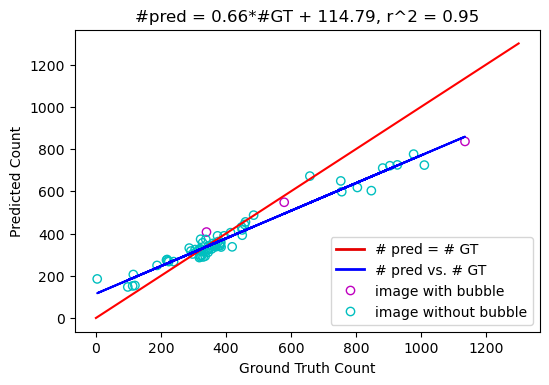

0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


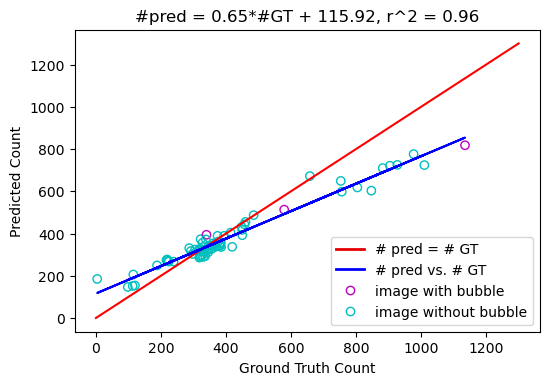

In [16]:
for bubble_thresh in [0.07, 0.075, 0.08]:
    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        if name in bubble_image_names:
            colors.append('m')
            threshold=bubble_thresh
        else:
            colors.append('c')
            threshold=0.1
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=threshold)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='r')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()